In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
select = ['logF_sigmoid',
          'logF_sigmoid_faminter',
          'logSlogT_trainlink_faminter',
          'pca_d=2', 'pca_d=3', 'pca_d=4',
          'factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4']

names = ['logF_sigmoid',
         'logF_sigmoid_faminter',
         'logSlogT_trainlink_faminter',
         'PCA + logFlops (d=2)', 'PCA + logFlops (d=3)', 'PCA + logFlops (d=4)',
         'Factor model (d=2)','Factor model (d=3)','Factor model (d=4)']

In [34]:
benchs_names_list = [['MMLU','ARC','HellaSwag','Winogrande','TruthfulQA','GSM8K'],
                     ['IFEval','BBH','MATH Lvl 5','GPQA','MUSR','MMLU-PRO'],
                     ['MMLU','ARC','HellaSwag','Winogrande','TruthfulQA','GSM8K','IFEval','BBH','MATH Lvl 5','GPQA','MUSR','MMLU-PRO']] 
methods_names = ['logF_sigmoid', 'logF_trainlink', 'logF_sigmoid_faminter', 'logF_trainlink_faminter',
                 'logSlogT_sigmoid', 'logSlogT_trainlink', 'logSlogT_sigmoid_faminter', 'logSlogT_trainlink_faminter',
                 'pca_d=2', 'pca_d=3', 'pca_d=4',
                 'factor_sigmoid_d=2','factor_sigmoid_d=3','factor_sigmoid_d=4',
                 'factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4']
len(methods_names)

17

In [37]:
results.shape

(11, 17, 12)

In [39]:
len(test_families_list[-1])

11

In [43]:
test_families_list = [[['bloom'],
                           ['codegen-nl'],
                           ['codellama'],
                           ['deepseek-coder-base'],
                           ['pythia','dolly-v2'],
                           ['falcon'],
                           ['gemma', 'gemma-it','sauerkrautlm-gemma'],
                           ['gpt-j-neo-neox'], 
                           ['internlm2'],
                           ['meta-llama-3', 'meta-llama-3-instruct'],
                           ['mpt', 'mpt-chat','mpt-instruct'],
                           ['olmo'],
                           ['opt'],
                           ['qwen2'],
                           ['rwkv-4-pile'],
                           ['starcoder2'],
                           ['stablelm-base-alpha'],
                           ['xglm'],
                           ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']],
                          [['bloom'],
                           ['pythia','dolly-v2'],
                           ['falcon','falcon-instruct'],
                           ['gemma-2', 'gemma-2-it'],
                           ['gpt-j-neo-neox'], 
                           ['meta-llama-3', 'meta-llama-3-instruct','llama-3-sauerkrautlm-instruct'],
                           ['olmo'],
                           ['opt'],
                           ['qwen2','qwen2-instruct','dolphin-2.9.2-qwen2'],
                           ['starcoder2'],
                           ['smollm', 'smollm-instruct'],
                           ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']],
                          [['bloom'],
                           ['pythia','dolly-v2'],
                           ['falcon'],
                           ['gemma', 'gemma-it', 'sauerkrautlm-gemma'],
                           ['gpt-j-neo-neox'], 
                           ['meta-llama-3', 'meta-llama-3-instruct'],
                           ['olmo'],
                           ['opt'],
                           ['qwen2'],
                           ['starcoder2'],
                           ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']]]

select_fam = [['meta-llama-3', 'meta-llama-3-instruct'],
              ['meta-llama-3', 'meta-llama-3-instruct','llama-3-sauerkrautlm-instruct'],
              ['qwen2'],
              ['qwen2','qwen2-instruct','dolphin-2.9.2-qwen2'],
              ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']]

3


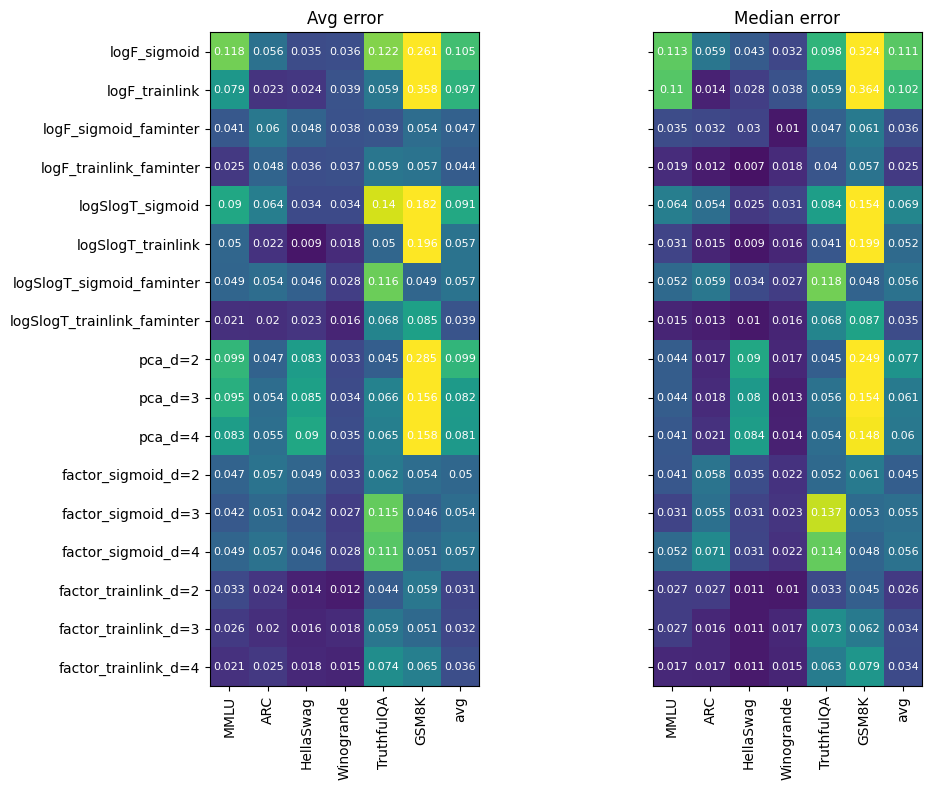

3


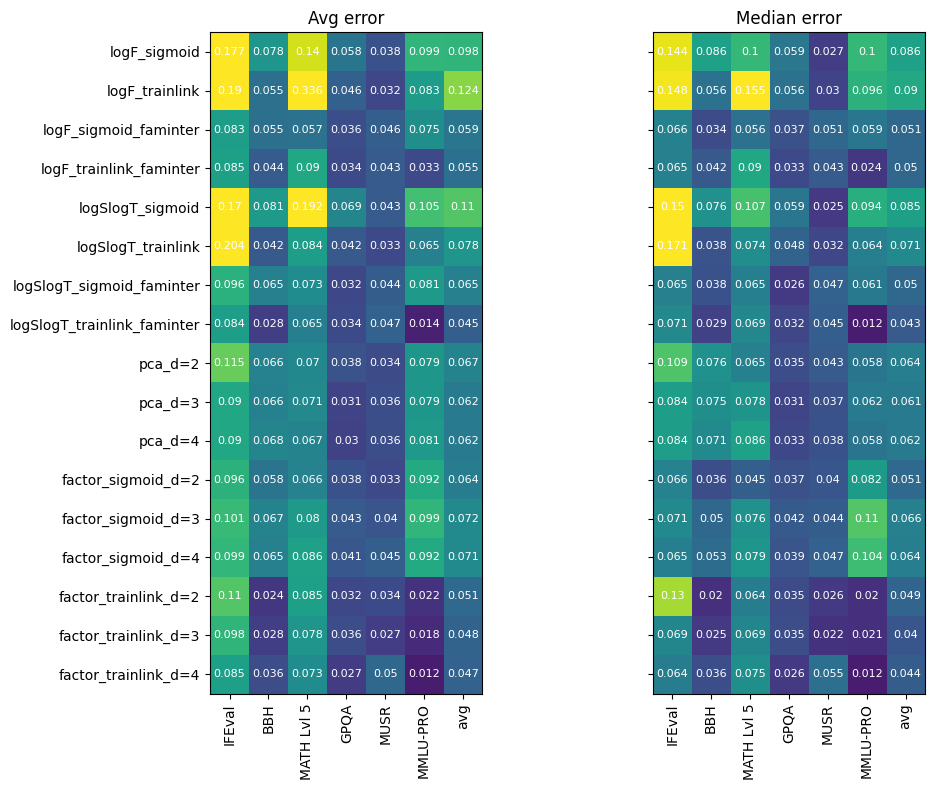

3


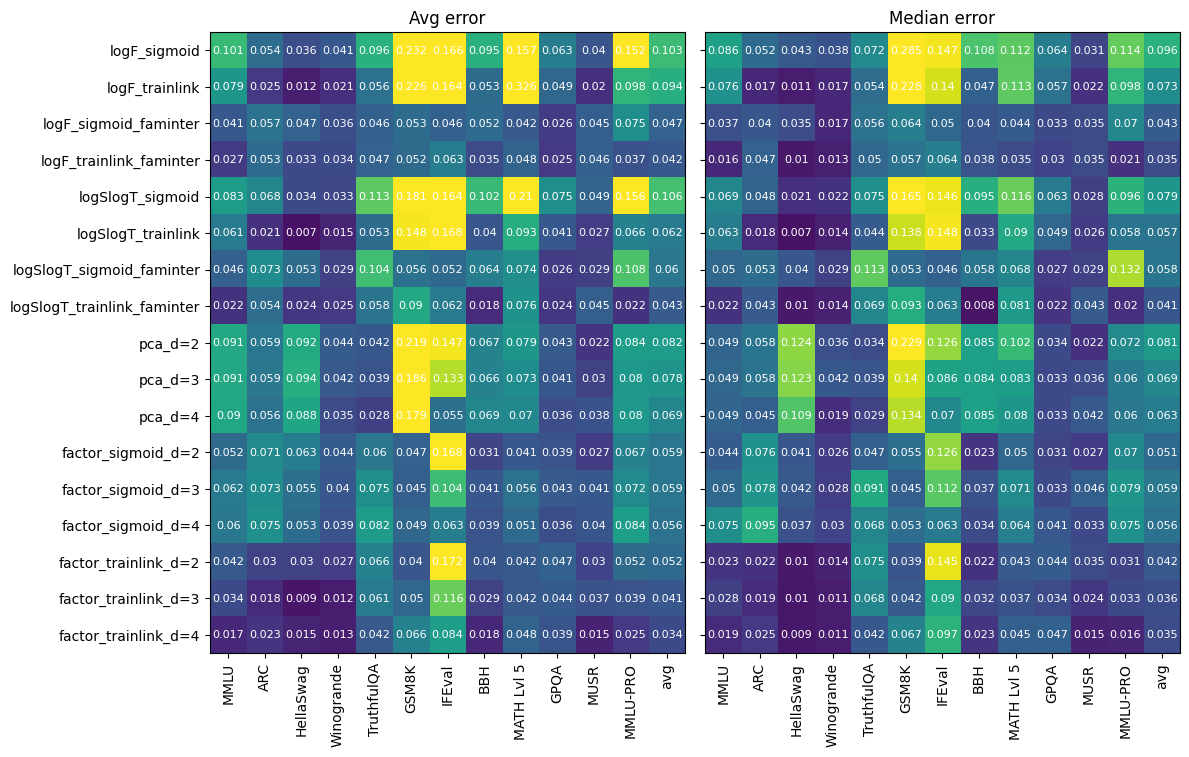

In [44]:
for rr in range(3):
    results = np.load(f'errors_{rr}_{1}.npy',allow_pickle=True).item()['out'] #_{1}
    results = np.array([e[0].mean(1) for e in results])

    #ids = [i for i,f in enumerate(test_families_list[rr]) if f in select_fam]
    #print(len(ids))
    #results = results[ids]
    
    # Assuming compute_error and benchs_names_list are defined, as well as cov, logistic_basic_errors, pca_errors, etc.
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))  # Create a figure with 2 subplots side by side
    fig.subplots_adjust(wspace=0.01)  # Decrease wspace to bring the subplots closer

    # Define the color range
    vmin, vmax = 0, 0.15
    
    # Plot 1: Average Error
    M = np.mean(results,0).T
    M = np.vstack((M,M.mean(0)[None,:])).T
    im1 = axes[0].imshow(M, vmin=vmin, vmax=vmax)
    axes[0].set_xticks(np.arange(len(benchs_names_list[rr])+1))
    axes[0].set_xticklabels(benchs_names_list[rr]+['avg'], rotation=90)
    axes[0].set_yticks(np.arange(M.shape[0]))
    axes[0].set_yticklabels(methods_names)
    axes[0].set_title('Avg error')
    # Loop over data dimensions and create text annotations.
    for i in range(len(M)):
        for j in range(len(M.T)):
            text = axes[0].text(j, i, np.round(M[i, j],3),size=8,
                           ha="center", va="center", color="w")
    #fig.colorbar(im1, ax=axes[0])
    
    # Plot 2: Median Error
    M = np.median(results,0).T
    M = np.vstack((M,M.mean(0)[None,:])).T
    im2 = axes[1].imshow(M, vmin=vmin, vmax=vmax)
    axes[1].set_xticks(np.arange(len(benchs_names_list[rr])+1))
    axes[1].set_xticklabels(benchs_names_list[rr]+['avg'], rotation=90)
    axes[1].set_yticks(np.arange(M.shape[0]))
    axes[1].set_yticklabels(['' for i in range(len(methods_names))])#methods_names
    axes[1].set_title('Median error')
    # Loop over data dimensions and create text annotations.
    for i in range(len(M)):
        for j in range(len(M.T)):
            text = axes[1].text(j, i, np.round(M[i, j],3),size=8,
                           ha="center", va="center", color="w")
    #fig.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
